In [10]:
from rascal.calibrator import Calibrator
from rascal.util import refine_peaks

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import json

from scipy.signal import find_peaks
import pkg_resources

In [2]:
#data_path = pkg_resources.resource_filename("rascal", "data/frodo_arc.npy")
spectra = np.fliplr(np.load("./frodo_arc.npy"))

In [48]:
def solve_frodo(spectrum, plot_peaks=False, plot_fit=False):
    spectrum[spectrum <= 0] = 1e-9
     
    peaks, _ = find_peaks(spectrum, prominence=300, distance=20)
    refined_peaks = refine_peaks(spectrum, peaks, window_width=3)

    if plot_peaks:
        intensity_range = max(spectrum) - min(spectrum)
        fig = plt.figure(figsize=(16,8))
        ax = fig.add_subplot("110")
        ax.plot(spectrum)
        ax.vlines(refined_peaks,
                  spectrum[refined_peaks.astype('int')]+0.05*intensity_range,
                  max(spectrum)+0.05*intensity_range,
                  linestyle='dashed',
                  alpha=0.4,
                  color='red')
        plt.xlabel("Pixel")
        plt.ylabel("Intensity (arbitrary)")
        plt.ylim(0,20000)
        plt.show()
    
    c = Calibrator(refined_peaks, min_wavelength=5600,
                      max_wavelength=8100,
                      num_pixels=len(spectrum))

    c.set_fit_constraints(range_tolerance=200, ransac_thresh=1)
    c.add_atlas("Xe", min_wavelength=5900)
    
    best_p = c.fit(max_tries=1000)

    best_p, x_fit, y_fit = c.match_peaks_to_atlas(best_p, polydeg=5, tolerance=0.5)

    if plot_fit:
        c.plot_fit(spectrum, best_p, plot_atlas=True, tolerance=0.2)
        
    fit_diff = c.polyval(best_p,x_fit)-y_fit

    rms = np.sqrt(np.sum(fit_diff**2/len(x_fit)))

    print("Stdev error: {} A".format(fit_diff.std()))
    
    return fit_diff.std(), best_p

In [49]:
frodo_results = [solve_frodo(spectrum) for spectrum in spectra]


Stdev error: 0.07184281047712142 A



Stdev error: 0.0903505562638269 A



Stdev error: 0.061992839497666645 A



Stdev error: 0.09147651981197166 A



Stdev error: 0.06714085588816568 A



Stdev error: 0.07057852679723668 A



Stdev error: 0.06818237814538196 A



Stdev error: 0.06559787496957888 A



Stdev error: 0.06446802340407981 A



Stdev error: 0.06601078415779142 A



Stdev error: 0.06466204915676918 A



Stdev error: 0.06746777784377905 A



Stdev error: 0.06716130698752197 A



Stdev error: 0.10462595965126097 A



Stdev error: 0.06654371061350925 A



Stdev error: 0.09680313060638265 A



Stdev error: 0.07003088812894676 A



Stdev error: 0.09324398459861544 A



Stdev error: 0.06069047177402127 A



Stdev error: 0.06517009160032097 A



Stdev error: 0.07487719388127974 A



Stdev error: 0.06577070437970085 A



Stdev error: 0.09281554920015435 A



Stdev error: 0.07510805554971528 A



Stdev error: 0.06920881633786509 A



Stdev error: 0.08376525838661784 A



Stdev error: 0.0799282185531996 A



Stdev error: 0.07270419719065069 A



Stdev error: 0.09782243498296059 A



Stdev error: 0.0748893485949266 A



Stdev error: 0.06826218724979494 A



Stdev error: 0.08091545603145149 A



Stdev error: 0.07346421692542648 A



Stdev error: 0.07457552999564433 A



Stdev error: 0.07141574230863176 A



Stdev error: 0.0753066450950793 A



Stdev error: 0.06636907649298063 A



Stdev error: 0.0747236310253859 A



Stdev error: 0.06839423055121416 A



Stdev error: 0.0757866890038496 A



Stdev error: 0.07358506234394502 A



Stdev error: 0.08635618184015034 A



Stdev error: 0.07184836142774892 A



Stdev error: 0.10128458488608917 A



Stdev error: 0.07729962092038688 A



Stdev error: 0.0723659914343833 A



Stdev error: 0.07893254928737473 A



Stdev error: 0.09800249776180504 A



Stdev error: 0.07140777831917929 A



Stdev error: 0.07482718824190604 A



Stdev error: 0.07570705778775352 A



Stdev error: 0.07433619971758099 A



Stdev error: 0.08288532570789525 A



Stdev error: 0.09925125266020275 A



Stdev error: 0.07251590053734501 A



Stdev error: 0.07524258232718932 A



Stdev error: 0.1184270692964265 A



Stdev error: 0.0649959353290955 A



Stdev error: 0.08605198114485646 A



Stdev error: 0.06516010655542187 A



Stdev error: 0.06706938329142709 A



Stdev error: 0.07215281545329658 A



Stdev error: 0.06839351942897404 A



Stdev error: 0.0861887035117595 A



Stdev error: 0.10201089466352743 A



Stdev error: 0.09229747906454075 A



Stdev error: 0.07466734725528745 A



Stdev error: 0.06933995093324112 A



Stdev error: 0.10653164286944401 A



Stdev error: 0.1056162440916754 A



Stdev error: 0.10589278982250651 A



Stdev error: 0.11140873857838972 A



Stdev error: 0.07084825554029749 A



Stdev error: 0.09526290412874604 A



Stdev error: 0.08856827351576747 A



Stdev error: 0.0748223410595919 A



Stdev error: 0.1101036005783539 A



Stdev error: 0.08769862558930543 A



Stdev error: 0.10403332841987754 A



Stdev error: 0.11333563296838661 A



Stdev error: 0.08096692239755413 A



Stdev error: 0.07750711727461163 A



Stdev error: 0.10317634490044918 A



Stdev error: 0.07721621842798522 A



Stdev error: 0.10596021329386181 A



Stdev error: 0.08208292212150364 A



Stdev error: 0.10523082778032102 A



Stdev error: 0.07845980282708237 A



Stdev error: 0.09278819829524589 A



Stdev error: 0.10358706649039158 A



Stdev error: 0.11367857688474534 A



Stdev error: 0.07189273281016371 A



Stdev error: 0.08047426996612023 A



Stdev error: 0.10237453441807334 A



Stdev error: 0.09967268040507282 A



Stdev error: 0.09549418386928489 A



Stdev error: 0.08131391733685904 A



Stdev error: 0.08878477818541186 A



Stdev error: 0.10559839782955369 A



Stdev error: 0.07386681203965756 A



Stdev error: 0.07480132410778007 A



Stdev error: 0.10372933037965047 A



Stdev error: 0.09699460534075818 A



Stdev error: 0.10002335080601522 A



Stdev error: 0.09911924230657614 A



Stdev error: 0.07262259296432243 A



Stdev error: 0.07328080385317264 A



Stdev error: 0.10876556403564139 A



Stdev error: 0.047300542678456334 A



Stdev error: 0.04469522119691798 A



Stdev error: 0.08450990344681389 A



Stdev error: 0.10594970027025653 A



Stdev error: 0.11157186734101124 A



Stdev error: 0.08998683854589956 A



Stdev error: 0.11408358789223265 A



Stdev error: 0.07794835072172253 A



Stdev error: 0.07940269879997112 A



Stdev error: 0.11320901493648217 A



Stdev error: 0.09700604891090589 A



Stdev error: 0.10560786688606842 A



Stdev error: 0.10312210973994743 A



Stdev error: 0.07955045695493806 A



Stdev error: 0.10911987354659944 A



Stdev error: 0.10158294728810022 A



Stdev error: 0.07744927179879561 A



Stdev error: 0.07907362975224057 A



Stdev error: 0.10673110749451091 A



Stdev error: 0.10112836324022463 A



Stdev error: 0.1016879826136124 A



Stdev error: 0.10070338343792448 A



Stdev error: 0.10231180015024391 A



Stdev error: 0.10021369764585503 A



Stdev error: 0.1043981293533356 A



Stdev error: 0.07162425422103014 A



Stdev error: 0.070809411977013 A



Stdev error: 0.0772205358807336 A



Stdev error: 0.10946475027157351 A



Stdev error: 0.07544491682840226 A



Stdev error: 0.10120168010939473 A



Stdev error: 0.0961556666093101 A



Stdev error: 0.07016239118514331 A



Stdev error: 0.08430954605809134 A



Stdev error: 0.08249620377852886 A



Stdev error: 0.07105962931660481 A


In [60]:
errs = np.array([res[0] for res in frodo_results])

Text(0, 0.5, 'Count')

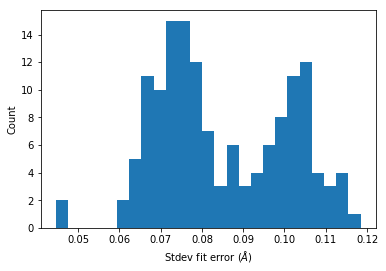

In [70]:
a = plt.hist(errs, 25)
plt.xlabel("Stdev fit error ($\AA$)")
plt.ylabel("Count")

In [59]:
init_wavelength = np.array([res[1][-1] for res in frodo_results])

Text(0, 0.5, 'Initial wavelength ($\\AA$)')

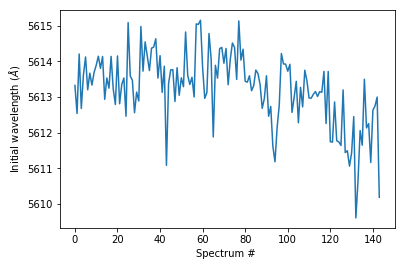

In [71]:
plt.plot(init_wavelength)
plt.xlabel("Spectrum # ")
plt.ylabel("Initial wavelength ($\AA$)")

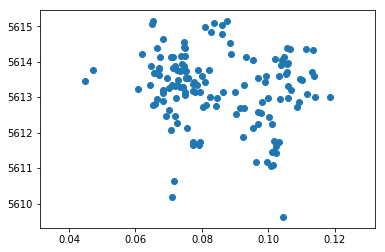

In [72]:
plt.scatter(errs, init_wavelength)